# The midterm report and 5-minute presentation should include the following.

- Preliminary visualizations of data.
- Detailed description of data processing done so far.
- Detailed description of data modeling methods used so far.
- Preliminary results. (e.g. we fit a linear model to the data and we achieve promising results, or we did some clustering and we notice a clear pattern in the data)

We expect to see preliminary code in your project repo at this point.

Your report should be submitted as README.md in your project GitHub repo.

The 5-minute presentation should be a recording uploaded to YouTube. Please add the video link to the beginning of your report.

# Visualizations of Data

In [30]:
import pandas as pd

# Load the TSV Data File
# df = pd.read_csv('./data/aml_ohsu_2022_clinical_data.tsv', sep='\t') # load the data (tsv file so need to specify sep)
df = pd.read_csv('./data/breast_cancer.csv') # load the data 


## Data Analysis

In [31]:
# 1. Check basic info of the data
print("Data Shape:", df.shape) # check the shape of the data
df.info() # check the basic info of the data

print()
# 2. Check the first few rows of the data
print("First 5 rows:")
df.head() # check the first few rows of the data


Data Shape: (569, 32)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  peri

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [32]:
# 3. Check the statistic of the data
df.describe() # only numeric columns
df.describe(include='all') # include all columns

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.037183e+07,NaN,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,NaN,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,NaN,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,NaN,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,NaN,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,NaN,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080


## Missing Values

In [34]:
# 4. Check the missing values
missing_values = pd.DataFrame({
    'Num of Missing Values' : df.isnull().sum(), # check the missing values
    'Percentage of Missing Values' : (df.isnull().sum()/len(df) * 100).round(2) # check the percentage of missing values
})
display(missing_values)

# Filter to show columns with missing value percentage greater than a certain threshold (e.g., 20%)
high_missing_values = missing_values[missing_values['Percentage of Missing Values'] > 20]
display(high_missing_values)

print("Note: There is no missing values")
# print("Note: 'TP53 Pathway' Column has over 90% missing data")

# 5. Check the unique values
df.duplicated().sum() # check the number of duplicated rows
df.duplicated().sum()/len(df) * 100 # check the percentage of duplicated rows

# 6. Check the unique values in each column
df.columns # check the columns of the data

,Num of Missing Values,Percentage of Missing Values
id,0,0.0
diagnosis,0,0.0
radius_mean,0,0.0
texture_mean,0,0.0
perimeter_mean,0,0.0
area_mean,0,0.0
smoothness_mean,0,0.0
compactness_mean,0,0.0
concavity_mean,0,0.0
concave points_mean,0,0.0


,Num of Missing Values,Percentage of Missing Values


Note: There is no missing values


Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

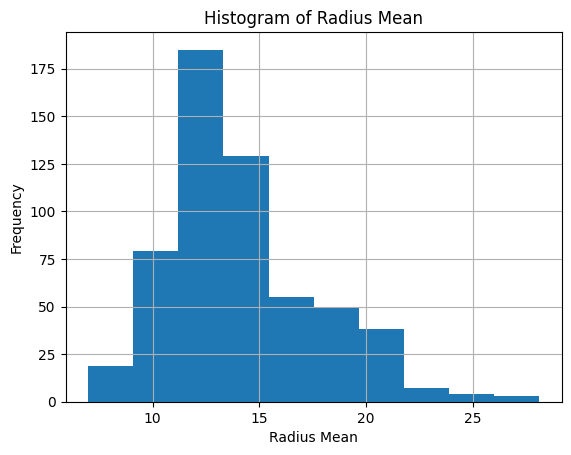

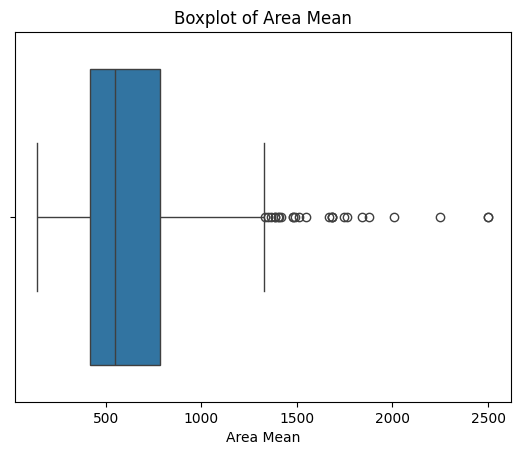

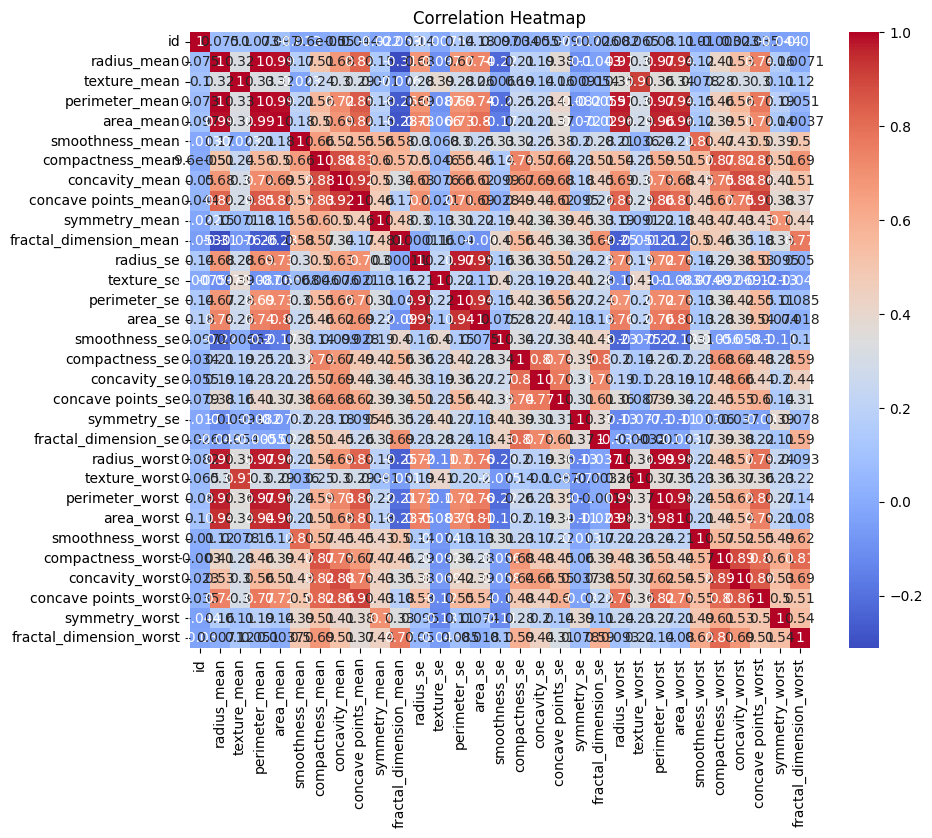

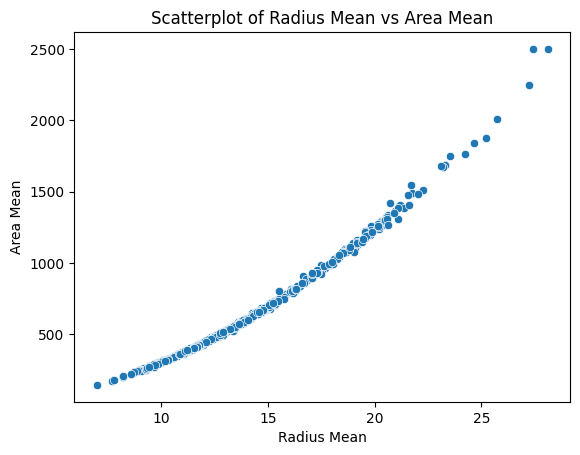

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram
df['radius_mean'].hist()
plt.title('Histogram of Radius Mean')
plt.xlabel('Radius Mean')
plt.ylabel('Frequency')
plt.show()

# Boxplot
sns.boxplot(data=df, x='area_mean')
plt.title('Boxplot of Area Mean')
plt.xlabel('Area Mean')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,8))
# Select only numeric columns to avoid errors
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Scatterplot
sns.scatterplot(data=df, x='radius_mean', y='area_mean')
plt.title('Scatterplot of Radius Mean vs Area Mean')
plt.xlabel('Radius Mean')
plt.ylabel('Area Mean')
plt.show()


# Preprocessing

### 1. Outlier Detection and Handling

   - Use boxplots to identify potential outliers in key variables (e.g., 'radius_mean', 'area_mean').
   -  Consider removing or transforming outliers to improve model performance.

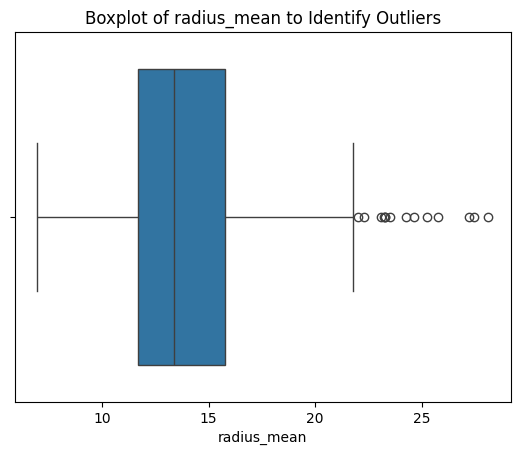

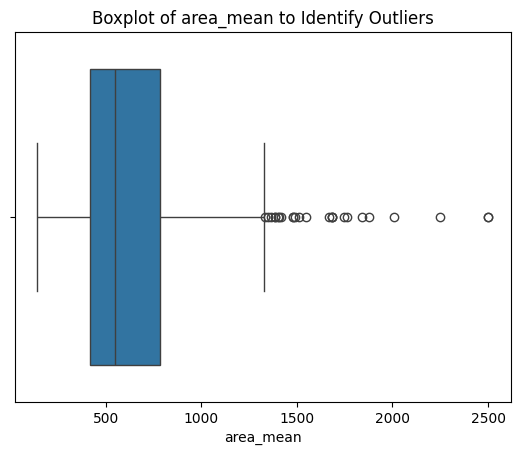

Data Shape after Outlier Removal: (544, 32)


In [41]:
# Outlier Detection and Handling Code
# Identifying outliers in 'radius_mean' and 'area_mean' using boxplots
for column in ['radius_mean', 'area_mean']:
    plt.figure()
    sns.boxplot(data=df, x=column)
    plt.title(f'Boxplot of {column} to Identify Outliers')
    plt.xlabel(column)
    plt.show()

# Handling outliers: Removing rows where 'radius_mean' or 'area_mean' are beyond 1.5 times the IQR
Q1 = df[['radius_mean', 'area_mean']].quantile(0.25)
Q3 = df[['radius_mean', 'area_mean']].quantile(0.75)
IQR = Q3 - Q1

# Filtering data to remove outliers
df = df[~((df[['radius_mean', 'area_mean']] < (Q1 - 1.5 * IQR)) | (df[['radius_mean', 'area_mean']] > (Q3 + 1.5 * IQR))).any(axis=1)]
print("Data Shape after Outlier Removal:", df.shape)

### 2. Data Normailization or Standatdization

- Normalize or standardize numeric features such as 'radius_mean', 'area_mean', etc., for improved model convergence.
- Use StandardScaler or MinMaxScaler from sklearn.

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Select numeric columns for normalization or standardization
numeric_columns = numeric_df.columns 

# Using StandardScaler to standardize numeric features
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Alternatively, use MinMaxScaler for normalization
# minmax_scaler = MinMaxScaler()
# df[numeric_columns] = minmax_scaler.fit_transform(df[numeric_columns])

print("Data after Standardization:")
df.head()

Data after Standardization:


/var/folders/xt/y_17jz6n3p77v5p6cbm1tstr0000gn/T/ipykernel_75875/3430538098.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numeric_columns] = scaler.fit_transform(df[numeric_columns])


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-0.232673,M,1.431985,-2.049264,1.643846,1.437201,1.609820,3.506035,3.092072,3.047488,...,2.369714,-1.338944,2.878823,2.769892,1.311223,2.678113,2.227969,2.529901,2.733861,1.909210
1,-0.232671,M,2.296479,-0.325132,2.136775,2.626377,-0.802250,-0.447262,0.077827,0.755891,...,2.274195,-0.346475,1.965281,2.626143,-0.355442,-0.397224,-0.092941,1.243186,-0.242725,0.274857
2,0.487919,M,2.001613,0.486774,1.995241,2.176319,0.979213,1.167358,1.640088,2.475557,...,1.926408,-0.000417,1.742206,2.062556,0.538654,1.130172,0.937478,2.166898,1.145062,0.196093
3,0.488328,M,-0.769459,0.283797,-0.563109,-0.812719,3.336821,3.631215,2.262165,1.799367,...,-0.194603,0.157921,-0.156758,-0.541579,3.377194,3.966673,2.104596,2.401878,6.009554,4.868332
4,0.488415,M,2.202658,-1.125372,2.244145,2.520265,0.312777,0.628887,1.648571,1.772558,...,1.674140,-1.446679,1.731584,1.756805,0.234835,-0.279090,0.688756,0.862357,-0.863450,-0.394638



# 3. Feature Engineering

- Create new features based on domain knowledge, such as ratios or interactions between existing features.
- Example: Compute ratio of 'area_mean' to 'radius_mean' for additional insight.

In [44]:
# Feature Engineering Code
# Create a new feature: ratio of 'area_mean' to 'radius_mean'
df['area_to_radius_ratio'] = df['area_mean'] / df['radius_mean']
print("New Feature Created: area_to_radius_ratio")

# Example: Create interaction features
df['texture_radius_interaction'] = df['texture_mean'] * df['radius_mean']
print("New Feature Created: texture_radius_interaction")

# Create additional feature: Mean features group average and standard deviation
mean_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
df['mean_features_avg'] = df[mean_features].mean(axis=1)
df['mean_features_std'] = df[mean_features].std(axis=1)
print("New Features Created: mean_features_avg, mean_features_std")

# Create additional feature: Ratio of 'area_worst' to 'perimeter_worst'
df['area_to_perimeter_worst_ratio'] = df['area_worst'] / df['perimeter_worst']
print("New Feature Created: area_to_perimeter_worst_ratio")

# Create additional feature: Variation between worst and mean values
for feature in ['radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness', 'concavity', 'concave points', 'symmetry', 'fractal_dimension']:
    df[f'{feature}_variation'] = df[f'{feature}_worst'] - df[f'{feature}_mean']
    print(f"New Feature Created: {feature}_variation")

# Encode categorical feature 'diagnosis'
from sklearn.preprocessing import LabelEncoder
df['diagnosis'] = LabelEncoder().fit_transform(df['diagnosis'])
print("Categorical Feature 'diagnosis' encoded as numerical values")

# Feature Engineering Code
# Create a new feature: ratio of 'area_mean' to 'radius_mean'
df['area_to_radius_ratio'] = df['area_mean'] / df['radius_mean']
print("New Feature Created: area_to_radius_ratio")

# Example: Create interaction features
df['texture_radius_interaction'] = df['texture_mean'] * df['radius_mean']
print("New Feature Created: texture_radius_interaction")

New Feature Created: area_to_radius_ratio
New Feature Created: texture_radius_interaction
New Features Created: mean_features_avg, mean_features_std
New Feature Created: area_to_perimeter_worst_ratio
New Feature Created: radius_variation
New Feature Created: texture_variation
New Feature Created: perimeter_variation
New Feature Created: area_variation
New Feature Created: smoothness_variation
New Feature Created: compactness_variation
New Feature Created: concavity_variation
New Feature Created: concave points_variation
New Feature Created: symmetry_variation
New Feature Created: fractal_dimension_variation
Categorical Feature 'diagnosis' encoded as numerical values
New Feature Created: area_to_radius_ratio
New Feature Created: texture_radius_interaction


/var/folders/xt/y_17jz6n3p77v5p6cbm1tstr0000gn/T/ipykernel_75875/3592004360.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['area_to_radius_ratio'] = df['area_mean'] / df['radius_mean']
/var/folders/xt/y_17jz6n3p77v5p6cbm1tstr0000gn/T/ipykernel_75875/3592004360.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['texture_radius_interaction'] = df['texture_mean'] * df['radius_mean']
/var/folders/xt/y_17jz6n3p77v5p6cbm1tstr0000gn/T/ipykernel_75875/3592004360.py:12: SettingWithCopyWarning: 
A value i



# 4. Model Training
   - Implement a simple model such as Logistic Regression for binary classification (e.g., 'diagnosis').
    - Split the dataset into training and test sets using train_test_split from sklearn.
    - Fit the model and evaluate initial accuracy.

# 5. Advanced Modeling
    - Experiment with other machine learning models like Random Forests, SVM, or XGBoost.
    - Use cross-validation to tune hyperparameters for optimal performance.

# 6. Evaluation Metrics
    - Evaluate models using accuracy, precision, recall, F1-score, and ROC-AUC.
    - Use classification_report and confusion_matrix from sklearn for detailed evaluation.